# Shivam Singh.....  


# Task-4: To Explore Business Analytics


Perform ‘Exploratory Data Analysis’ on the provided dataset SampleSuperstore.
in this task the business owner of the retail firm and want to see how your company is performing.

# Dataset:
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing the Dataset

In [2]:
data=pd.read_csv("C:/Users/shivam singh/Desktop/SampleSuperstore.csv")
print("Data Imported successfully")

Data Imported successfully


In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Performing EDA..........

In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing value here

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# Analyzing the ''dataset'' through the package "pandas_profiling" 

It gives a HTML file in the same directory ( where we are working ) of the input data set named as "SampleSuperstore.html"
   (####)
it have a built in function that gives detail information about dataset automatically by just passing the dataset into function parameter.

In [10]:
from pandas_profiling import ProfileReport


In [11]:
profile=ProfileReport(data)
profile.to_file(output_file="SampleSuperstore.html")

In [12]:
active_imports()

[]

# Go & see the HTML file in your folder................

In [13]:
data["Country"].nunique()

1

There is only one country so it is better to drop this column from dataset. There also postal code is of no use also dropping postal code

In [14]:
# Removing the unimportant column
data=data.drop(["Country","Postal Code"],axis=1)

In [15]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Droping the Duplicate Values

In [16]:
data.drop_duplicates(keep='first',inplace=True)

In [17]:
data.shape

(9944, 11)

(9994-9944)=50 duplicates Values are dropped from dataset 

# Analysis of Data

In [18]:
s1=pd.Series(np.array(data['City']))
print(s1.describe())

count              9944
unique              531
top       New York City
freq                906
dtype: object


In [19]:
s2=pd.Series(np.array(data['Category']))
print(s2.describe())

count                9944
unique                  3
top       Office Supplies
freq                 5986
dtype: object


# Visualize the correlation between columns

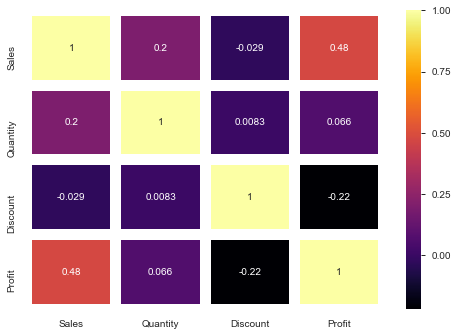

In [20]:
f,ax=plt.subplots()
sns.heatmap(data.corr(),annot=True,cmap='inferno',lw=10,linecolor='white')

# there are no such strong correalation found but according to heatmap -Sales & Quantity are moderately correlated

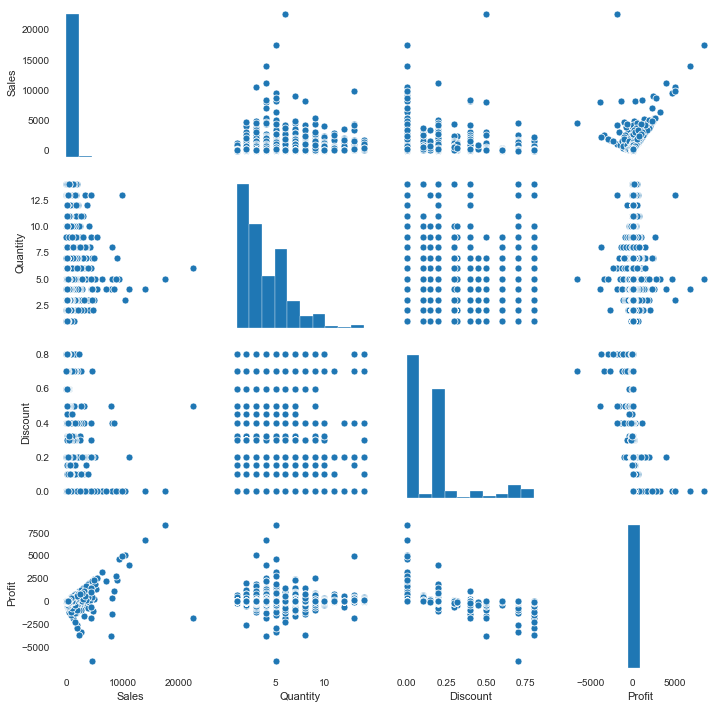

In [21]:
sns.pairplot(data)

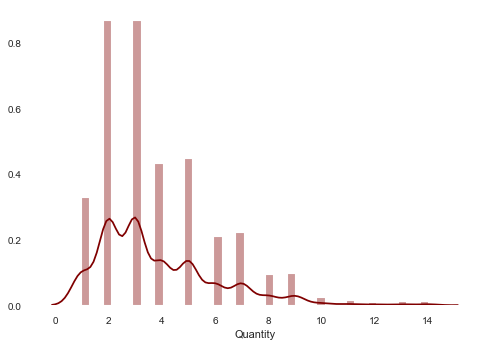

In [22]:
sns.distplot(data['Quantity'],color="maroon")
plt.show()

Accoding to this plot we see that people are buy items in 2 to 4 quantity,this signifies that most stores are in residential areas where families live and buy their essentials

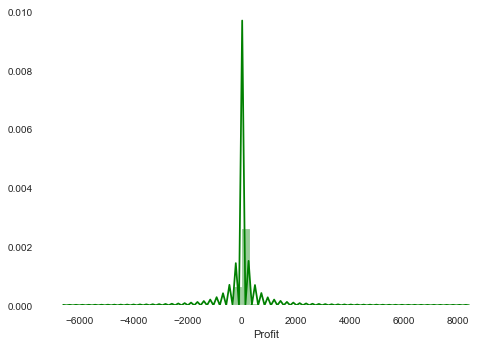

In [23]:
sns.distplot(data['Profit'],color='green')
plt.show()

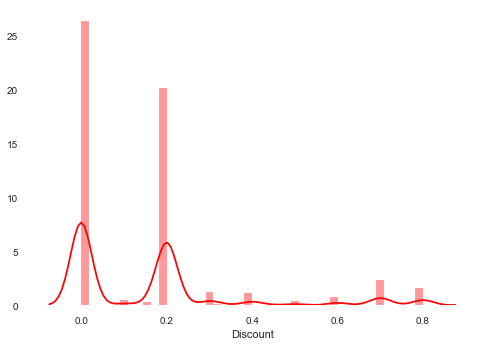

In [24]:
sns.distplot(data['Discount'],color='red')
plt.show()

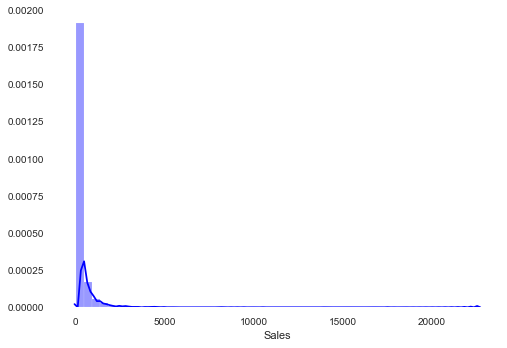

In [25]:
sns.distplot(data['Sales'],color='blue')
plt.show()

In [26]:
data['City'].value_counts()

New York City    906
Los Angeles      734
Philadelphia     531
San Francisco    503
Seattle          424
                ... 
Conway             1
Billings           1
Bartlett           1
Cheyenne           1
Vacaville          1
Name: City, Length: 531, dtype: int64

In [27]:
# Total City
data["City"].nunique()

531

In [28]:
# Total State
data["State"].nunique()

49

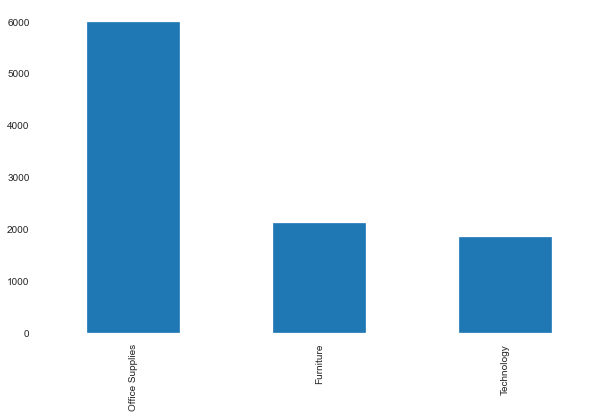

In [29]:
# Plotting the Category
plt.figure(figsize=(10,6))
data["Category"].value_counts().plot(kind='bar')
plt.show()

From this plot it is clear that office supplies have most sales

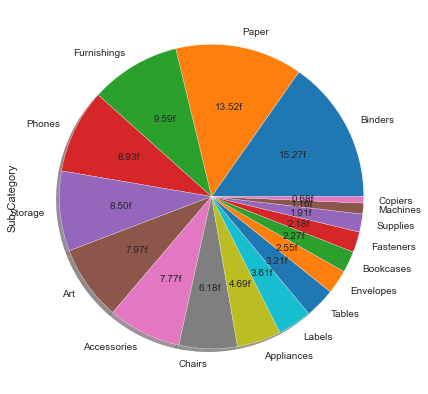

In [30]:
# finding which item is sale more in sub-Catgory
fig=plt.figure(figsize=(10,7))
data["Sub-Category"].value_counts().plot.pie(autopct='%.2ff',shadow=True)

Paper are most sales in  sub-category followed by Furnishing,Phones,Storege

In [31]:
# adding profit column in percentage
data["%_Profit"]=data['Profit']/data['Sales']*100
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [32]:
print("Maximun Profit:")
max(data['%_Profit'])

Maximun Profit:


50.0

In [33]:
print("Maximun Loss")
min(data["%_Profit"])

Maximun Loss


-275.0

In [34]:
# Checking all the Losses
loss=data[data['%_Profit']<0]
loss

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,-160.000000
9921,Standard Class,Home Office,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,-80.000000
9931,Standard Class,Consumer,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,-5.882353
9937,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772,-2.500000


total size of loss data=1871

In [35]:
# Calculating loss in data
1871/9994*100

18.721232739643785

means around 18% data in loss

# 1.Profit

#  City Wise Profit


In [36]:
profit_city=data.groupby('City').sum()['Profit']
profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [37]:
profit_city.sort_values(ascending=False).head()

City
New York City    62004.5903
Los Angeles      30308.4841
Seattle          29121.6825
San Francisco    17482.9366
Detroit          13146.6935
Name: Profit, dtype: float64

Cities which have the maximun profit 

In [38]:
profit_city.sort_values(ascending=True).head()

City
Philadelphia   -13869.1219
Houston        -10175.6309
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6639.9794
Name: Profit, dtype: float64

Cities which have the maximun Loss

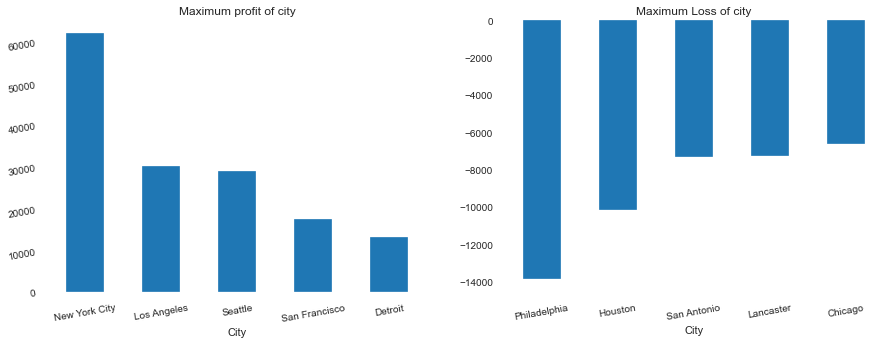

In [39]:
# Plotting
fig,axes=plt.subplots(1,2,figsize=(15,5))
profit_city.sort_values(ascending=False).head().plot(kind='bar',ax=axes[0])
axes[0].tick_params(labelrotation=10)
axes[0].set_title("Maximum profit of city")
profit_city.sort_values(ascending=True).head().plot(kind='bar',ax=axes[1])
plt.xticks(rotation=10)
plt.title("Maximum Loss of city")
plt.show()

from this plot we can see that New York City has maximun Profit & Philadelphia has Maximum Loss

# State wise Profit


Text(0.5, 1.0, 'State Wise Profit')

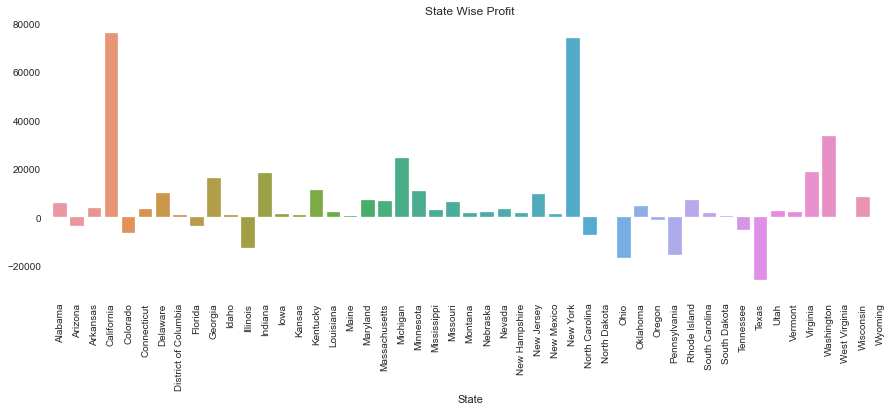

In [40]:
state_profit=data.groupby('State').sum()['Profit']

plt.figure(figsize=(15,5))
sns.barplot(x=state_profit.index,y=state_profit.values)
plt.xticks(rotation=90)
plt.title("State Wise Profit")

from this plot we can see that California state has maximun Profit & Texas state has Maximum Loss

# Region wise Profit

Text(0.5, 1.0, 'Region Wise Profit')

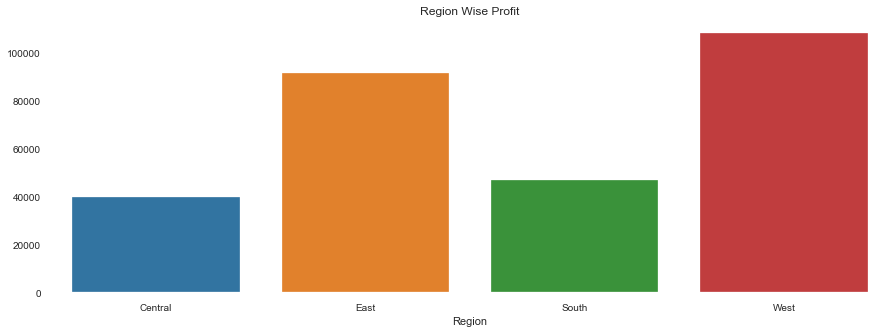

In [41]:
state_profit=data.groupby('Region').sum()['Profit']

plt.figure(figsize=(15,5))
sns.barplot(x=state_profit.index,y=state_profit.values)
plt.title("Region Wise Profit")

West Region has maximun Profit & South has minimum Profit

# Category wise profit

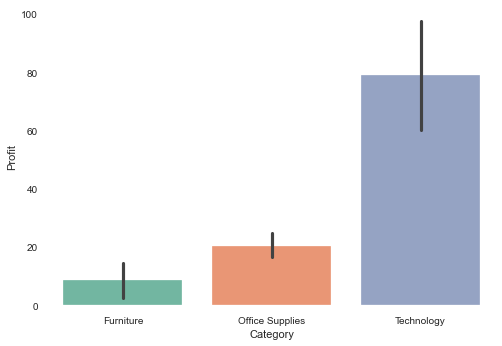

In [42]:
ax=sns.barplot(x="Category",y='Profit',data=data,palette="Set2")

Highest Profit is generated from Category="Technology"

# cetegory wise profit in each Region

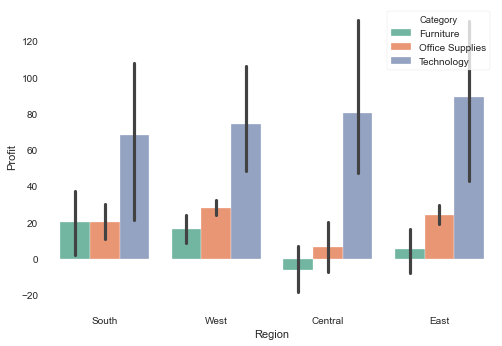

In [43]:
ax=sns.barplot(x="Region",y='Profit',hue='Category',data=data,palette="Set2")

Technology generates highest profit in each region

# Subcategory wise profit

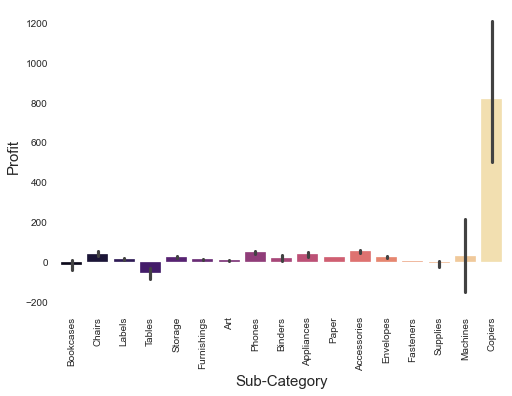

In [44]:
ax=sns.barplot(x="Sub-Category",y='Profit',data=data,palette="magma")
plt.xlabel("Sub-Category",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Copies are ganing huge profit followed by accessories and Phones

## 2.Sales

In [45]:
print("Maximun Sale:")
max(data['Sales'])

Maximun Sale:


22638.48

In [46]:
print("Minimun Sale:")
min(data['Sales'])

Minimun Sale:


0.444

# City Wise Sales

In [47]:
city_sale=pd.DataFrame(data.groupby('City').sum()['Sales'])
city_sale

,Sales
City,
Aberdeen,25.500
Abilene,1.392
Akron,2729.986
Albuquerque,2220.160
Alexandria,5519.570
...,...
Woonsocket,195.550
Yonkers,7657.666
York,817.978


In [48]:
city_sale_sort=city_sale.sort_values(by='Sales',ascending=False).head(10)

we take only 10 highest Sales value from City for analysis

C:\Users\shivam singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


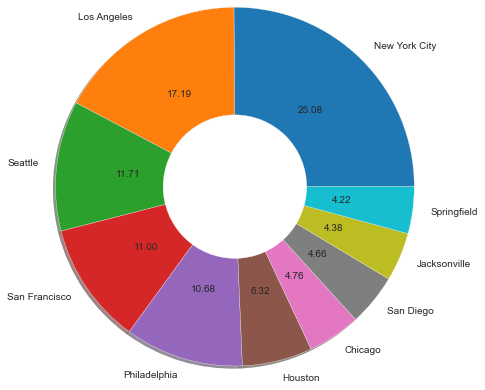

In [49]:
plt.pie(city_sale_sort,labels=city_sale_sort.index,autopct='%.2f',shadow=True,radius=1.5)
center_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

From this chart we can see that New York has Maximun Sales followed by Los Angeles and seattle

In [50]:
city_sale_sort_minimum=city_sale.sort_values(by='Sales',ascending=True).head(10)

C:\Users\shivam singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


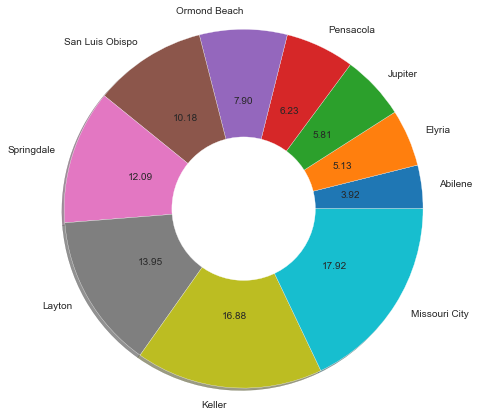

In [51]:
plt.pie(city_sale_sort_minimum,labels=city_sale_sort_minimum.index,autopct='%.2f',shadow=True,radius=1.5)
center_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

In [52]:
city_sale_sort_minimum

,Sales
City,
Abilene,1.392
Elyria,1.824
Jupiter,2.064
Pensacola,2.214
Ormond Beach,2.808
San Luis Obispo,3.620
Springdale,4.300
Layton,4.960
Keller,6.000


From this chart we can see that "Abilene" has Minimum Sales 

# State wise Sales

In [53]:
state_sale=pd.DataFrame(data.groupby('State').sum()['Sales'])

In [54]:
state_sale_sort=state_sale.sort_values(by='Sales',ascending=False).head(10)

C:\Users\shivam singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


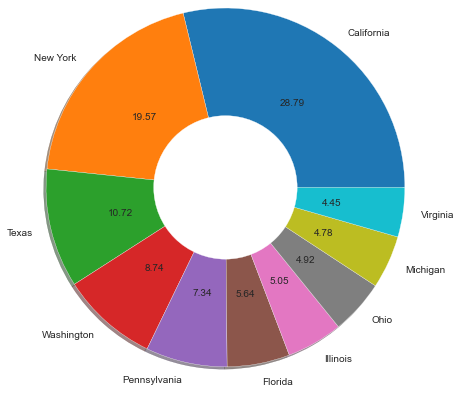

In [55]:
plt.pie(state_sale_sort,labels=state_sale_sort.index,autopct='%.2f',shadow=True,radius=1.5)
center_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

California acquire the First Position in Sales

In [56]:
state_sale_sort_min=state_sale.sort_values(by='Sales',ascending=True).head(10)

C:\Users\shivam singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


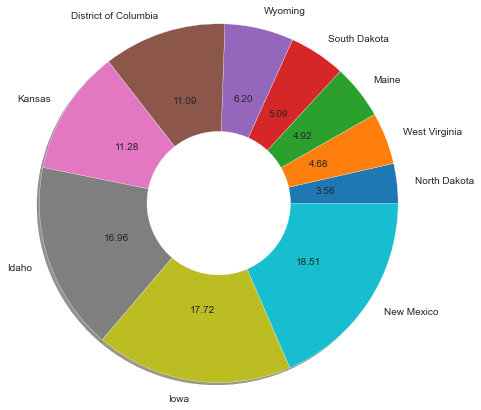

In [57]:
plt.pie(state_sale_sort_min,labels=state_sale_sort_min.index,autopct='%.2f',shadow=True,radius=1.5)
center_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

North Dakota got Last Positiion in Sales

# Region wise Sales

In [58]:
region_sale=pd.DataFrame(data.groupby('Region').sum()['Sales'])


In [59]:
region_sale_sort=region_sale.sort_values(by='Sales',ascending=False).head(10)

C:\Users\shivam singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


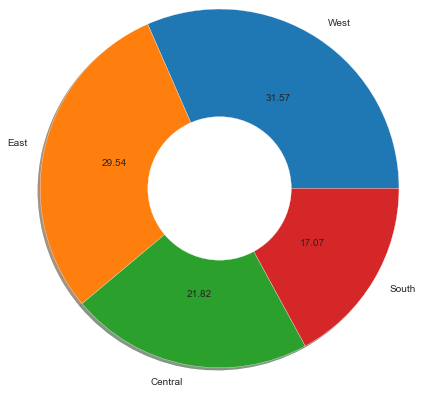

In [60]:
plt.pie(region_sale_sort,labels=region_sale_sort.index,autopct='%.2f',shadow=True,radius=1.5)
center_circle=plt.Circle((0,0),0.60,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)

Accorging to Region : West achive Maximun Sales and South achive Minimun Sales

# Category wise sale in each Region

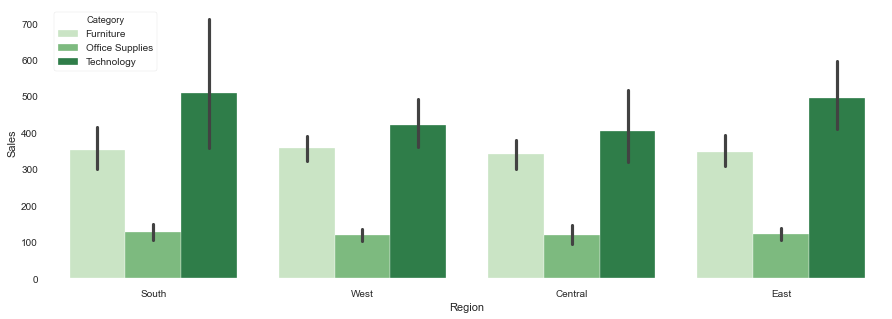

In [61]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x="Region",y="Sales",hue='Category',data=data,palette="Greens")

 In each region sales for ' office supplies' is good but in 'Technology' are very poor

# Segment wise count of the ship modes

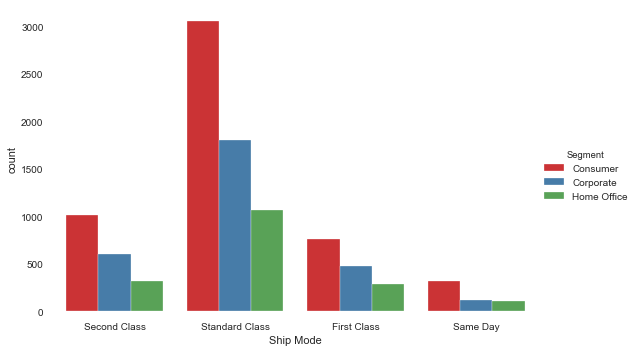

In [62]:
sns.catplot('Ship Mode',hue="Segment",data=data,kind='count',aspect=1.5,palette="Set1")

Consumer count is highest  in each case and Standard Class are generally prefered

# Thank You.........  :)